# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Redes Neurais e Deep Learning</span>


## Redes Adversariais Generativas - GANs

*Roseli Aparecida Francelin Romero*<br>
*ICMC/USP São Carlos*

**Exemplo de Rede GAN usando uma MLPs** tanto para:
- modelo Discriminador
- modelo Generativo
para gerar uma aproximação da Função Parabola

Gerando pontos aleatórios para esta função no intervalo: [-0.5, 0.5]

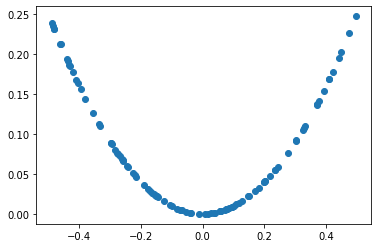

In [1]:

# Gerando amostras aleatórias de pontos para calcular X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generando inputs em [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# salvando as amostras geradas
data = generate_samples()
# plotando as amostras
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()


Usaremos estes pontos gerados para treinar o Discriminador.
Este é um problema de classificação binária.

Inputs: Amostra com 2  valores reais (x,y).
Outputs: Classificação Binária, probabilidade da amostra ser real (ou falsa).

Utilizaremos 1 cam interm. com 25 nós e usaremos ReLU.
Na cam. de saida, 1 neuronio, será usado a função sigmoid.
O modelo minimizará a função cross entropy binaria and como otimizador será usado o Adam (versão do gradiente descendente estocástico)

TREINANDO OS MODELOS COMPOSTOS

Vamos treinar o nosso modelo GAN para este problema de 1-dimensão.

In [2]:
# treinamento de uma rede generativa adversaria de uma funcao uni-dimensional
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# definindo o modelo discriminador
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# definindo o modelo generativo
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# definindo o Modelo combinado discriminador e generativo, atualizando o generativo
def define_gan(generator, discriminator):
	# fixando os pesos do Discriminador
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 

 

 



In [3]:
# generando n amostras verdadeiras com respectivos labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# gera os labels para esta classe V
	y = ones((n, 1))    # vetor de 1s - amostras verdadeiras
	return X, y


In [4]:
# gera pontos no espaço de latencia como input para a rede generativa
def generate_latent_points(latent_dim, n):
	# gera pontos no espaço de latencia
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [5]:
# Usando o modelo generativo para gerar n exemplos falsos, com respectivos labels
def generate_fake_samples(generator, latent_dim, n):
	# genera pontos no espaço de latencia
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))  # vetor de zeros - amostras falsas
	return X, y

In [6]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

2022-11-07 18:23:17.223998: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-07 18:23:17.575197: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-07 18:23:18.905296: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:23:19.232513: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:23:21.097260: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:23:21.617753: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:23:21.874483: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: 

999 0.47999998927116394 0.27000001072883606


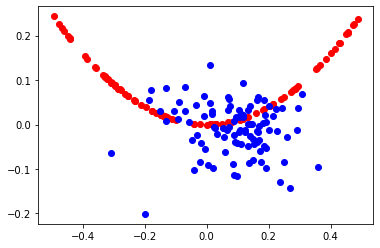

2022-11-07 18:24:25.652177: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:26.087301: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:26.455874: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:26.463711: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:26.773403: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:27.085898: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:28.869644: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:24:29.567357: W tensorflow/core/data/root_dataset.cc:16

1999 0.4099999964237213 1.0


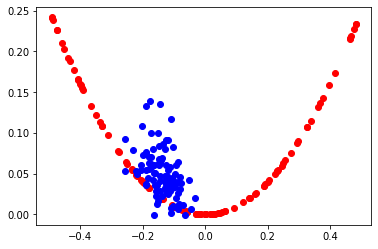

2022-11-07 18:25:31.543643: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:32.199950: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:32.336256: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:33.198080: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:33.656649: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:35.107346: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:35.114633: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:25:39.248013: W tensorflow/core/data/root_dataset.cc:16

2999 0.49000000953674316 0.7200000286102295


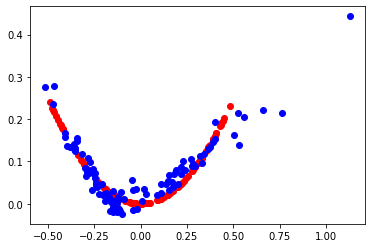

2022-11-07 18:26:40.467634: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:40.844181: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:40.907053: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:41.229637: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:44.300390: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:44.739219: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:44.745054: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:26:46.145589: W tensorflow/core/data/root_dataset.cc:16

3999 0.5600000023841858 0.4000000059604645


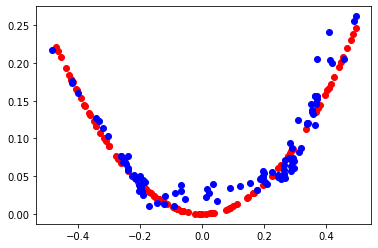

2022-11-07 18:27:46.664645: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:47.512750: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:47.841257: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:48.476504: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:48.818789: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:49.792202: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:50.499771: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:27:50.686831: W tensorflow/core/data/root_dataset.cc:16

4999 0.8199999928474426 0.25999999046325684


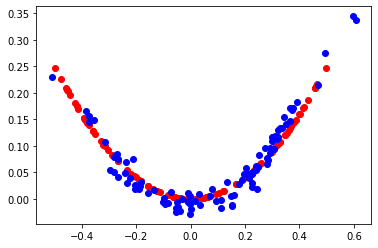

2022-11-07 18:28:54.210651: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:57.843212: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:57.849247: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:58.814817: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:59.272092: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:59.679121: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:28:59.872602: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:29:00.677845: W tensorflow/core/data/root_dataset.cc:16

5999 0.41999998688697815 0.5699999928474426


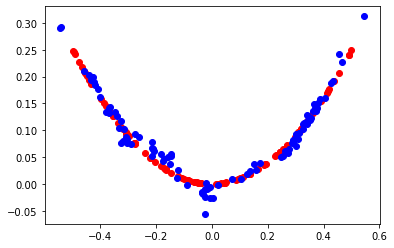

2022-11-07 18:30:02.355199: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:02.361830: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:03.586383: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:04.200855: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:05.056428: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:05.062263: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:05.461460: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:30:05.997695: W tensorflow/core/data/root_dataset.cc:16

6999 0.41999998688697815 0.5199999809265137


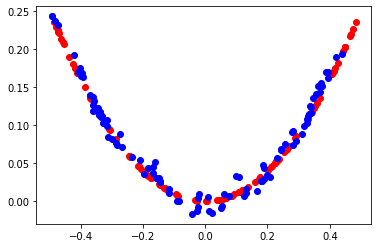

2022-11-07 18:31:11.953856: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:12.084513: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:12.150414: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:12.430862: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:12.856015: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:12.992968: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:14.360801: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:31:14.771148: W tensorflow/core/data/root_dataset.cc:16

7999 0.5199999809265137 0.5899999737739563


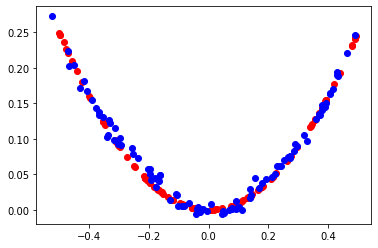

2022-11-07 18:32:19.539774: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:19.666263: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:19.880677: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:20.125791: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:20.132317: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:20.326654: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:20.798723: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:32:21.330736: W tensorflow/core/data/root_dataset.cc:16

8999 0.38999998569488525 0.6200000047683716


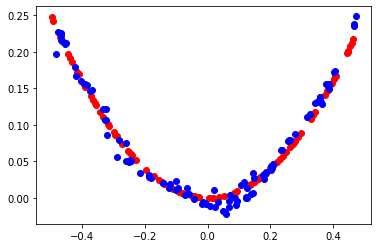

2022-11-07 18:33:26.451863: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:26.460081: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:30.150290: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:31.767587: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:31.830719: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:31.978257: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:32.174273: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled
2022-11-07 18:33:32.493401: W tensorflow/core/data/root_dataset.cc:16

9999 0.49000000953674316 0.5899999737739563


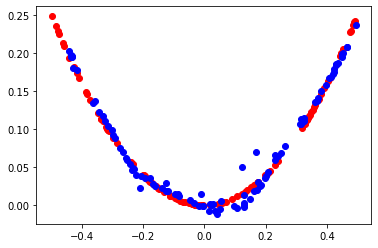

In [7]:

# treinamento das redes generativa e discriminadora
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=1000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# loop em epochs
	for i in range(n_epochs):
    # prepare amostras V
		x_real, y_real = generate_real_samples(half_batch)
		# prepare amostras F
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare pontos no  espaço de latencia como entradas para a rede generativa
		x_gan = generate_latent_points(latent_dim, n_batch)
		# cria  labels para as amostras F
		y_gan = ones((n_batch, 1))
		# atualiza a rede  generativa via erro do  discriminator
		gan_model.train_on_batch(x_gan, y_gan)
		# avalia o modelo a cada  n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)
 
# tamanho do espaço latente
latent_dim = 5
# criando o discriminator
discriminator = define_discriminator()
# criando o generativo
generator = define_generator(latent_dim)
# criando o modelo  gan
gan_model = define_gan(generator, discriminator)
# treinando o modelo
train(generator, discriminator, gan_model, latent_dim)